In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Separate features (X) and target variable (y)
X = df[['Glucose', 'BloodPressure','BMI']]
y = df['Outcome']

# Split data into training and testing sets (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print df
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


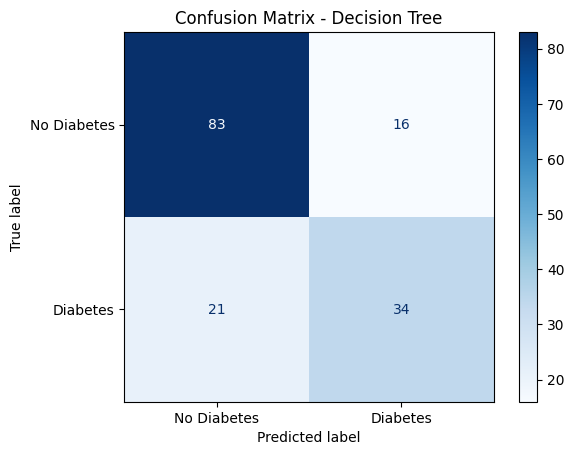

In [3]:
#  Decision Tree with specific hyperparameters
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate model
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [4]:
# tn, fp, fn, tp
tn, fp, fn, tp = cm.ravel()

# Precision
precision = tp / (tp + fp)

#recall
recall = tp / (tp + fn)

# f1
f1 = 2 * (precision * recall) / (precision + recall)

# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

#Printing the result
print(f"Decision Tree Classifier:\nAccuracy: {accuracy*100:.1f} %, Precision: {precision*100:.1f} %, Recall: {recall*100:.1f} %, F1 Score: {f1*100:.1f} %")

Decision Tree Classifier:
Accuracy: 76.0 %, Precision: 68.0 %, Recall: 61.8 %, F1 Score: 64.8 %


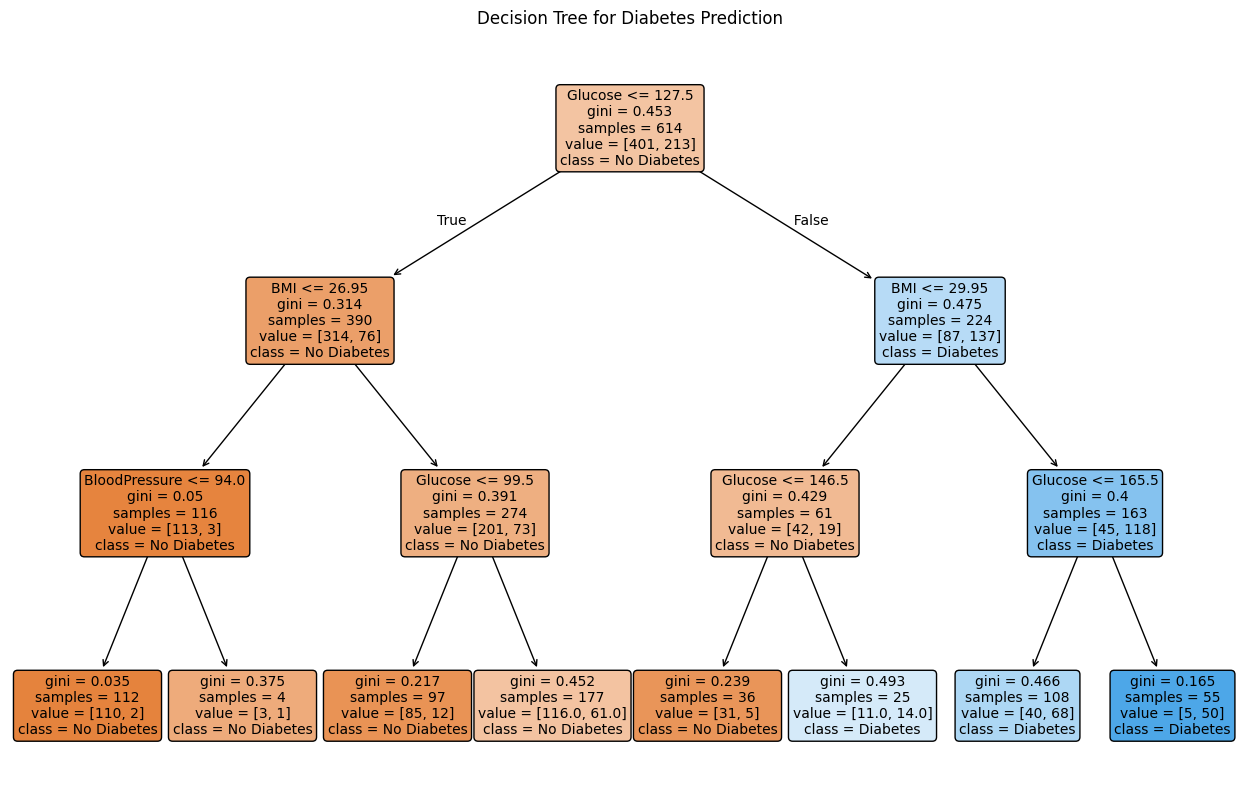

In [5]:
# Figure size
plt.figure(figsize=(16, 10))

# Visualize the decision tree
plot_tree(dt_model, 
          feature_names=['Glucose', 'BloodPressure', 'BMI'], 
          class_names=['No Diabetes', 'Diabetes'], 
          filled=True, 
          rounded=True,
          fontsize=10)

plt.title("Decision Tree for Diabetes Prediction")
plt.show()

In [6]:
# Reading the new dataset
df = pd.read_csv("SVMtrain.csv")
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
884,887,0,2,Male,27.0,0,0,13.0000,3
885,888,1,1,female,19.0,0,0,30.0000,3
886,889,0,3,female,60.0,1,2,23.4500,3
887,890,1,1,Male,26.0,0,0,30.0000,1


In [7]:
# Only keep selected features
X = df[['Pclass','Age', 'Fare','SibSp']]
y = df['Survived']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#printing the result
X_train,y_train

(     Pclass   Age      Fare  SibSp
 707       1  22.0  151.5500      0
 239       3  60.0   14.4542      1
 381       3  32.0    7.9250      0
 791       3  60.0   69.5500      8
 682       3  14.0   46.9000      5
 ..      ...   ...       ...    ...
 106       3  60.0    7.7750      0
 270       3  25.0    0.0000      0
 860       1  48.0   25.9292      0
 435       3  21.0   34.3750      2
 102       3  33.0    8.6542      0
 
 [711 rows x 4 columns],
 707    1
 239    0
 381    0
 791    0
 682    0
       ..
 106    1
 270    1
 860    1
 435    0
 102    0
 Name: Survived, Length: 711, dtype: int64)

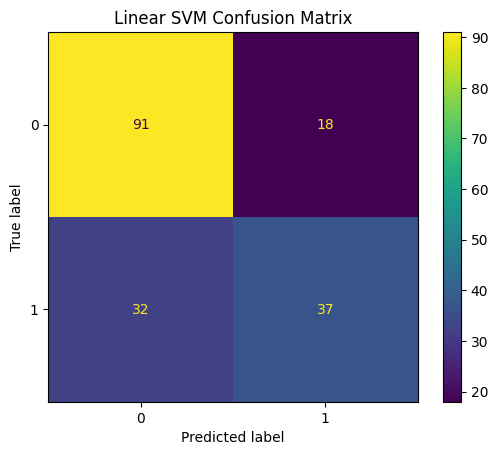

In [8]:
# svm with linear kernel
svm_linear = SVC(kernel='linear', C=1.0)

# Train the Linear SVM classifier
svm_linear.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_svm_linear = svm_linear.predict(X_test)

# Confusion matrix
# Compute the confusion matrix based on true and predicted labels on test data 
cm = confusion_matrix(y_test, y_pred_svm_linear)

# Create a confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()
# Set the title for the confusion matrix plot
disp.ax_.set_title("Linear SVM Confusion Matrix")
plt.show()

In [9]:
# tn, fp, fn, tp
tn, fp, fn, tp = cm.ravel()

# Precision
precision = tp / (tp + fp)

#recall
recall = tp / (tp + fn)

# f1
f1 = 2 * (precision * recall) / (precision + recall)

# Accuracy
accuracy_linear = (tp + tn) / (tp + tn + fp + fn)

#Printing the result
print(f"Decision Tree Classifier:\nAccuracy: {accuracy_linear*100:.1f} %, Precision: {precision*100:.1f} %, Recall: {recall*100:.1f} %, F1 Score: {f1*100:.1f} %")

Decision Tree Classifier:
Accuracy: 71.9 %, Precision: 67.3 %, Recall: 53.6 %, F1 Score: 59.7 %


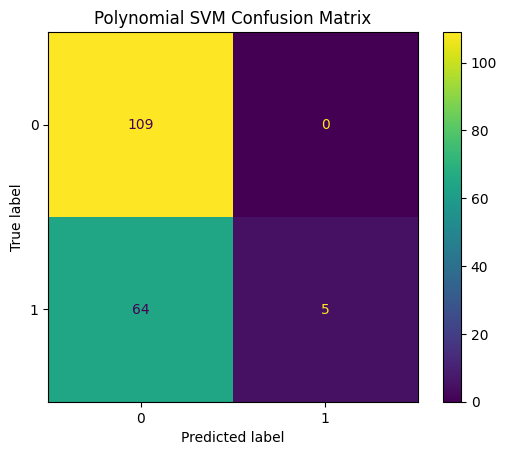

In [10]:
# SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0)

# Train the model using training data
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm_poly)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("Polynomial SVM Confusion Matrix")
plt.show()

In [11]:
# tn, fp, fn, tp
tn, fp, fn, tp = cm.ravel()

# Precision
precision = tp / (tp + fp)

#recall
recall = tp / (tp + fn)

# f1
f1 = 2 * (precision * recall) / (precision + recall)

# Accuracy
accuracy_poly = (tp + tn) / (tp + tn + fp + fn)

#Printing the result
print(f"Decision Tree Classifier:\nAccuracy: {accuracy_poly*100:.1f} %, Precision: {precision*100:.1f} %, Recall: {recall*100:.1f} %, F1 Score: {f1*100:.1f} %")

Decision Tree Classifier:
Accuracy: 64.0 %, Precision: 100.0 %, Recall: 7.2 %, F1 Score: 13.5 %


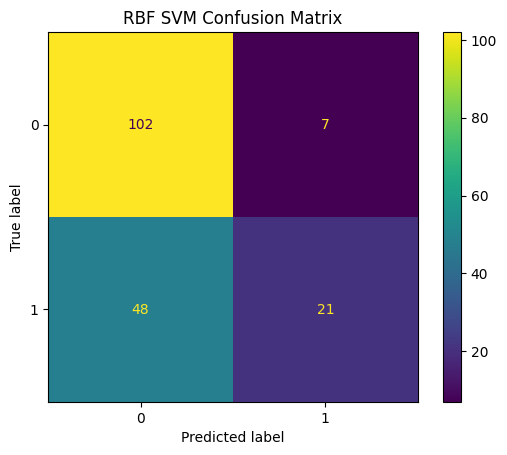

In [12]:
# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0)
svm_rbf.fit(X_train, y_train)
# Predict the labels for the test set
y_pred_svm_rbf = svm_rbf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("RBF SVM Confusion Matrix")
plt.show()

In [13]:
# tn, fp, fn, tp
tn, fp, fn, tp = cm.ravel()

# Precision
precision = tp / (tp + fp)

#recall
recall = tp / (tp + fn)

# f1
f1 = 2 * (precision * recall) / (precision + recall)

# Accuracy
accuracy_rbf = (tp + tn) / (tp + tn + fp + fn)

#Printing the result
print(f"Decision Tree Classifier:\nAccuracy: {accuracy_rbf*100:.1f} %, Precision: {precision*100:.1f} %, Recall: {recall*100:.1f} %, F1 Score: {f1*100:.1f} %")

Decision Tree Classifier:
Accuracy: 69.1 %, Precision: 75.0 %, Recall: 30.4 %, F1 Score: 43.3 %


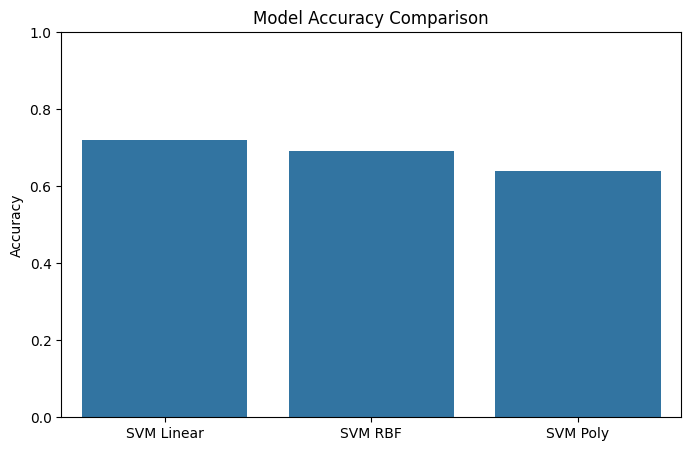

In [14]:
# Collect all model accuracies into a dictionary
accuracies = {
    "SVM Linear": accuracy_linear,
    "SVM RBF": accuracy_rbf,
    "SVM Poly": accuracy_poly,
   
}


plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()